In [303]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


In [304]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [305]:
submit=pd.read_csv("gender_submission.csv")

In [306]:
submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [307]:
train.head(4)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [308]:
train.columns.difference(test.columns)

Index(['Survived'], dtype='object')

In [309]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [310]:
print("train:",train.shape)
print("test:",test.shape)

train: (891, 12)
test: (418, 11)


In [311]:
train['source']="train"
test['source']="test"

In [343]:
data=pd.concat([train,test])
data.reset_index(inplace=True)

In [344]:

data["Title"]=data["Name"].str.extract('([A-Za-z]+)\.',expand=False)
data["Title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [373]:
data["Title"].replace(['Lady','Sir','Mme','Don','Capt','Countess','Jonkheer','Dona'],'Royal',inplace=True)
data['Title'].replace('Ms','Miss',inplace=True)
data['Title'].value_counts()

#drop Name

Mr        757
Miss      262
Mrs       197
Master     61
Royal       8
Rev         8
Dr          8
Col         4
Major       2
Mlle        2
Name: Title, dtype: int64

In [315]:
data['PassengerId'].nunique()
#drop Passengerid

1309

In [316]:
data['Name'].nunique()
#Can groupby Mr/Mrs/Miss

1307

In [317]:
data['Ticket'].value_counts(normalize=True,ascending=False)*100
#drop Ticket

CA. 2343        0.840336
CA 2144         0.611154
1601            0.611154
PC 17608        0.534759
S.O.C. 14879    0.534759
                  ...   
113792          0.076394
36209           0.076394
323592          0.076394
315089          0.076394
359309          0.076394
Name: Ticket, Length: 929, dtype: float64

### Hypothesis

1.Pclass might have impact on survived persons

2.Port of Embarkation vs survival

3.Chances of survival of Parents/nany with children is likely to be less




<AxesSubplot:ylabel='Survived'>

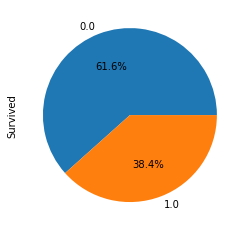

In [318]:
data['Survived'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(9,4))
#Survived people are less compared to death count

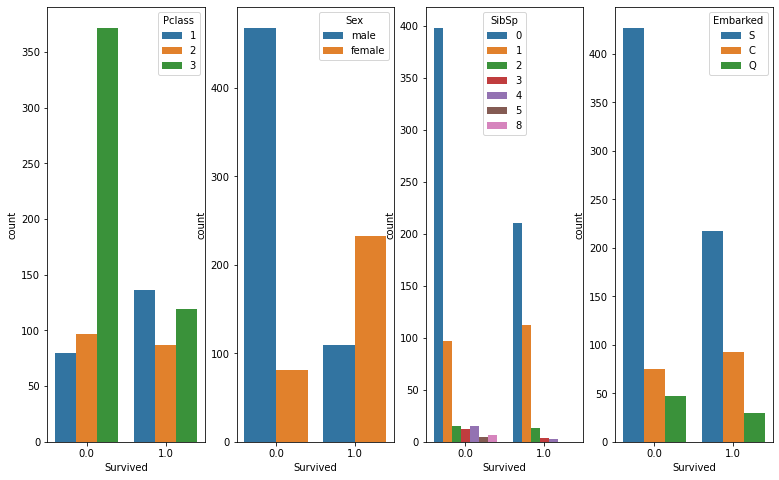

In [319]:
fig,ax=plt.subplots(1,4,figsize=(13,8))

for ind,i in enumerate(['Pclass','Sex','SibSp','Embarked']):
    sns.countplot("Survived",data=data,hue=i,ax=ax[ind])
    #data[i].value_counts().plot.pie(ax=[1],subplots=True,autopct='%1.1f%%')
    

In [ ]:
# 3rd class people death rate is high compared to other clases
# Female Survival rate is high compared to male

In [348]:
data.drop(['PassengerId','Name','Ticket'],inplace=True,axis=1,)
data.drop('index',inplace=True,axis=1,)

In [349]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,source,Title
0,0.0,3,male,22.0,1,0,7.2500,NaN,S,train,Mr
1,1.0,1,female,38.0,1,0,71.2833,C85,C,train,Mrs
2,1.0,3,female,26.0,0,0,7.9250,NaN,S,train,Miss
3,1.0,1,female,35.0,1,0,53.1000,C123,S,train,Mrs
4,0.0,3,male,35.0,0,0,8.0500,NaN,S,train,Mr
...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,male,NaN,0,0,8.0500,NaN,S,test,Mr
1305,NaN,1,female,39.0,0,0,108.9000,C105,C,test,Dona
1306,NaN,3,male,38.5,0,0,7.2500,NaN,S,test,Mr
1307,NaN,3,male,NaN,0,0,8.0500,NaN,S,test,Mr


In [350]:
data.isna().sum()

Survived     418
Pclass         0
Sex            0
Age          263
SibSp          0
Parch          0
Fare           1
Cabin       1014
Embarked       2
source         0
Title          0
dtype: int64

In [356]:
data.groupby(['Sex','Title'])['Age'].median()

Sex     Title   
female  Countess    33.0
        Dona        39.0
        Dr          49.0
        Lady        48.0
        Miss        22.0
        Mlle        24.0
        Mme         24.0
        Mrs         35.5
        Ms          28.0
male    Capt        70.0
        Col         54.5
        Don         40.0
        Dr          47.0
        Jonkheer    38.0
        Major       48.5
        Master       4.0
        Mr          29.0
        Rev         41.5
        Sir         49.0
Name: Age, dtype: float64

In [358]:
data['Age']=data.groupby(['Sex','Title'])['Age'].apply(lambda x:x.fillna(x.median()))

In [126]:
data.groupby(['Pclass','Sex','SibSp'])['Fare'].median()

Pclass  Sex     SibSp
1       female  0         80.0000
                1         81.8583
                2         51.4792
                3        263.0000
        male    0         30.5000
                1         79.4250
                2        133.6500
                3        263.0000
2       female  0         13.5000
                1         26.0000
                2         27.0000
                3         21.0000
        male    0         13.0000
                1         26.0000
                2         39.0000
3       female  0          7.8792
                1         15.5000
                2         19.2583
                3         25.4667
                4         31.2750
                5         46.9000
                8         69.5500
        male    0          7.8958
                1         15.5000
                2         21.6792
                3         22.0250
                4         31.3875
                5         46.9000
                8         

In [359]:
data['Fare']=data.groupby(['Pclass','Sex','SibSp'])['Fare'].transform(lambda x:x.fillna(x.median()))

In [361]:
data.groupby(['Pclass','Sex','Title'])['Embarked'].count()

Pclass  Sex     Title   
1       female  Countess      1
                Dona          1
                Dr            1
                Lady          1
                Miss         59
                Mlle          2
                Mme           1
                Mrs          76
        male    Capt          1
                Col           4
                Don           1
                Dr            5
                Jonkheer      1
                Major         2
                Master        5
                Mr          159
                Sir           1
2       female  Miss         50
                Mrs          55
                Ms            1
        male    Dr            2
                Master       11
                Mr          150
                Rev           8
3       female  Miss        150
                Mrs          65
                Ms            1
        male    Master       45
                Mr          448
Name: Embarked, dtype: int64

In [362]:
data['Embarked']=data.groupby(['Pclass','Sex','Title'])['Embarked'].transform(lambda x:x.fillna(x.mode()[0]))

In [264]:
data['Cabin'].isna().sum()/len(data['Cabin'])

0.774637127578304

In [363]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,source,Title
0,0.0,3,male,22.0,1,0,7.2500,NaN,S,train,Mr
1,1.0,1,female,38.0,1,0,71.2833,C85,C,train,Mrs
2,1.0,3,female,26.0,0,0,7.9250,NaN,S,train,Miss
3,1.0,1,female,35.0,1,0,53.1000,C123,S,train,Mrs
4,0.0,3,male,35.0,0,0,8.0500,NaN,S,train,Mr


In [ ]:
data.drop("Cabin",inplace=True,axis=1)

In [368]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,source,Title
0,0.0,3,male,22.0,1,0,7.2500,S,train,Mr
1,1.0,1,female,38.0,1,0,71.2833,C,train,Mrs
2,1.0,3,female,26.0,0,0,7.9250,S,train,Miss
3,1.0,1,female,35.0,1,0,53.1000,S,train,Mrs
4,0.0,3,male,35.0,0,0,8.0500,S,train,Mr


In [375]:
data.isna().sum()

Survived    418
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
source        0
Title         0
dtype: int64

In [377]:
data['Title'].value_counts()

Mr        757
Miss      262
Mrs       197
Master     61
Royal       8
Rev         8
Dr          8
Col         4
Major       2
Mlle        2
Name: Title, dtype: int64

In [381]:
data['Title']=data['Title'].map({"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Royal": 4, "Rev": 5,"Dr":6,"col":7,"Major":8,"Mlle":9})

In [382]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,source,Title
0,0.0,3,male,22.0,1,0,7.2500,S,train,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,train,2.0
2,1.0,3,female,26.0,0,0,7.9250,S,train,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,train,2.0
4,0.0,3,male,35.0,0,0,8.0500,S,train,0.0


<AxesSubplot:>

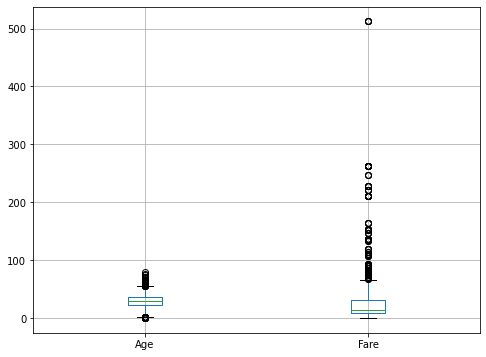

In [391]:
data.boxplot(column=['Age','Fare'],figsize=(8,6))

In [393]:
for col in ['Age','Fare']:
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    iqr=q3-q1
    
    low_outlier = q1-1.5*iqr
    up_outlier=q3+1.5*iqr
    
    data.loc[(data[col]<low_outlier) | (data[col]>up_outlier),col]=data[col].median()

In [394]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,source,Title
0,0.0,3,male,22.0,1,0,7.2500,S,train,0.0
1,1.0,1,female,38.0,1,0,14.4542,C,train,2.0
2,1.0,3,female,26.0,0,0,7.9250,S,train,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,train,2.0
4,0.0,3,male,35.0,0,0,8.0500,S,train,0.0
...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,male,29.0,0,0,8.0500,S,test,0.0
1305,NaN,1,female,39.0,0,0,14.4542,C,test,4.0
1306,NaN,3,male,38.5,0,0,7.2500,S,test,0.0
1307,NaN,3,male,29.0,0,0,8.0500,S,test,0.0


<AxesSubplot:>

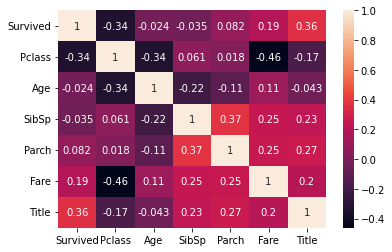

In [421]:
corr_ = data.corr()
sns.heatmap(corr_,annot = True)

In [405]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [434]:
X_vif=data.drop(['source','Title','Sex','Embarked','Survived'],axis=1)
X_vif.values

array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    , 38.    ,  1.    ,  0.    , 14.4542],
       [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 3.    , 38.5   ,  0.    ,  0.    ,  7.25  ],
       [ 3.    , 29.    ,  0.    ,  0.    ,  8.05  ],
       [ 3.    ,  4.    ,  1.    ,  1.    , 22.3583]])

In [435]:
Vif=pd.DataFrame()
Vif['Feature']=X_vif.columns
Vif

,Feature
0,Pclass
1,Age
2,SibSp
3,Parch
4,Fare


In [436]:
Vif['Vif']=[variance_inflation_factor(X_vif.values,i) for i in range(len(X_vif.columns))]
Vif

,Feature,Vif
0,Pclass,3.789415
1,Age,5.222194
2,SibSp,1.559645
3,Parch,1.453540
4,Fare,3.079895


In [429]:

data_1=pd.get_dummies(data.drop('source',axis=1),drop_first=True)
data_1

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,Sex_male,Embarked_Q,Embarked_S
0,0.0,3,22.0,1,0,7.2500,0.0,1,0,1
1,1.0,1,38.0,1,0,14.4542,2.0,0,0,0
2,1.0,3,26.0,0,0,7.9250,1.0,0,0,1
3,1.0,1,35.0,1,0,53.1000,2.0,0,0,1
4,0.0,3,35.0,0,0,8.0500,0.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,29.0,0,0,8.0500,0.0,1,0,1
1305,NaN,1,39.0,0,0,14.4542,4.0,0,0,0
1306,NaN,3,38.5,0,0,7.2500,0.0,1,0,1
1307,NaN,3,29.0,0,0,8.0500,0.0,1,0,1


In [430]:
train_df = data_1.loc[data_['Survived'].isna()==False]
test_df = data_1.loc[data_['Survived'].isna()==True]


In [432]:
train_df.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,Sex_male,Embarked_Q,Embarked_S
0,0.0,3,22.0,1,0,7.2500,0.0,1,0,1
1,1.0,1,38.0,1,0,14.4542,2.0,0,0,0
2,1.0,3,26.0,0,0,7.9250,1.0,0,0,1


In [523]:
train_df['Title']=train_df['Title'].transform(lambda x:x.fillna(x.median()))
test_df['Title']=test_df['Title'].transform(lambda x:x.fillna(x.median()))

In [524]:
test_df.reset_index(drop=True,inplace=True)
test_df.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,Sex_male,Embarked_Q,Embarked_S
0,NaN,3,34.5,0,0,7.8292,0.0,1,1,0
1,NaN,3,47.0,1,0,7.0000,2.0,0,0,1
2,NaN,2,29.0,0,0,9.6875,0.0,1,1,0


In [525]:
test_df_main=test_df.drop('Survived',axis=1)

In [526]:
test_df.isna().sum()

Survived      418
Pclass          0
Age             0
SibSp           0
Parch           0
Fare            0
Title           0
Sex_male        0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [527]:
X=train_df.drop('Survived',axis=1)
Y=train_df['Survived']

In [528]:
from sklearn.model_selection import train_test_split,cross_validate

In [529]:
train_xx, test_xx, train_yy, test_yy = train_test_split(X,Y,test_size = 0.2,random_state=2)

In [530]:
print(train_xx.shape)
print(test_xx.shape)
print(train_yy.shape)
print(test_yy.shape)

(712, 9)
(179, 9)
(712,)
(179,)


In [532]:
from sklearn.preprocessing import StandardScaler

In [533]:

sc = StandardScaler()
train_xx = sc.fit_transform(train_xx)
test_xx = sc.transform(test_xx)
test_df_main = sc.transform(test_df_main)


In [534]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [535]:
lr = LogisticRegression()
lr.fit(train_xx,train_yy)

LogisticRegression()

In [536]:
pred_lr_y= lr.predict(test_xx)
accuracy_score(pred_lr_y,test_yy)

0.776536312849162

<AxesSubplot:>

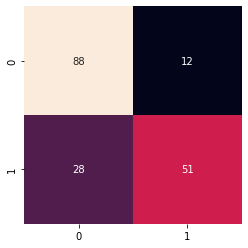

In [537]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm = confusion_matrix(test_yy,pred_lr_y)

sns.heatmap(cm,square = True,annot = True,cbar= False)

In [538]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

In [539]:
#cross Validation starts
# lr = LogisticRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lr,train_xx,train_yy,cv=folds,scoring="accuracy")
scores

array([0.83916084, 0.77622378, 0.78169014, 0.80985915, 0.82394366])

In [540]:

pred_test = lr.predict(test_df_main)

predictions_test_final = ['Y' if y>0.5 else 'N' for y in pred_test]

submit['Survived'] = predictions_test_final
submit.to_csv("./submission_Titanic.csv",index = False)

In [542]:
from sklearn.neighbors import KNeighborsClassifier
#train_model 
KNN = KNeighborsClassifier().fit(train_xx,train_yy)

pred_Kn_y = KNN.predict(test_xx)
accuracy_score(pred_Kn_y,test_yy)

0.7653631284916201

In [545]:
pred_test_knn = KNN.predict(test_df_main)

predictions_knn_final = ['Y' if y>0.5 else 'N' for y in pred_test_knn]

submit['Survived'] = predictions_knn_final
submit.to_csv("./submission_KNN.csv",index = False)